In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as clr
from matplotlib import cm
from rich.progress import track

sns.set(color_codes=True, style="white")

### Load Data

In [2]:
folder = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/distinct_interaction_modes"
os.chdir(folder)

color_FL = "#BD2433"
color_1x = "#E88791"
color_2x = "#BD2433"

In [3]:
df_1x = pd.read_csv("colocalization_AIO_concat-FL_1x_100ms.csv")
df_2x = pd.read_csv("colocalization_AIO_concat-FL_2x_100ms.csv")

### Functions

In [4]:
def calculate_dwell_stats(df):
    array_in_condensate = df["InCondensate"].to_numpy()
    array_trackID = df["RNA_trackID"].to_numpy()
    # Find the indices where the array changes from False to True or vice versa
    change_indices_condensate = (
        np.where(array_in_condensate[:-1] != array_in_condensate[1:])[0] + 1
    )
    # Find the indices where the trackID changes
    change_indices_trackID = np.where(array_trackID[:-1] != array_trackID[1:])[0] + 1
    columns = [
        "filename",
        "fname_RNA",
        "fname_condensate",
        "rna_trackID",
        "tracklength",
        "mean_x",
        "mean_y",
        "N_dwell_per_track",
        "total_dwell_time_s",
        "frac_dwell",
        "mean_R_nm",
        "mean_d2center_nm",
        "norm_d2center",
        "mean_d2edge_nm",
        "norm_d2edge",
        "t",
        "x",
        "y",
        "InCondensate",
    ]
    lst_rows_of_df = []
    for i in track(range(len(change_indices_trackID) - 1)):
        idx_track_start = change_indices_trackID[i]
        idx_track_end = change_indices_trackID[i + 1]

        df_track = df.iloc[idx_track_start:idx_track_end]

        bool_change_indices_condensate_within_track = (
            change_indices_condensate >= change_indices_trackID[i]
        ) & (change_indices_condensate <= change_indices_trackID[i + 1])
        N_dwell_per_track = np.sum(bool_change_indices_condensate_within_track)

        if N_dwell_per_track == 0:
            continue

        filename = df_track["filename"].unique()[0]
        fname_RNA = df_track["fname_RNA"].unique()[0]
        fname_condensate = df_track["fname_condensate"].unique()[0]
        rna_trackID = df_track["RNA_trackID"].unique()[0]
        tracklength = df_track.shape[0]
        mean_x = df_track["x"].mean()
        mean_y = df_track["y"].mean()
        # N_dwell_per_track
        total_dwell_time = np.sum(df_track["InCondensate"].to_numpy()) * 0.1
        frac_dwell = total_dwell_time / tracklength
        mean_R_nm = df_track["R_nm"].mean()
        mean_d2center_nm = df_track["distance_to_center_nm"].mean()
        norm_d2center = mean_d2center_nm / mean_R_nm
        mean_d2edge_nm = df_track["distance_to_edge_nm"].mean()
        norm_d2edge = mean_d2edge_nm / mean_R_nm

        new_row = [
            filename,
            fname_RNA,
            fname_condensate,
            rna_trackID,
            tracklength,
            mean_x,
            mean_y,
            N_dwell_per_track,
            total_dwell_time,
            frac_dwell,
            mean_R_nm,
            mean_d2center_nm,
            norm_d2center,
            mean_d2edge_nm,
            norm_d2edge,
            df_track["t"].to_numpy(),
            df_track["x"].to_numpy(),
            df_track["y"].to_numpy(),
            df_track["InCondensate"].to_numpy(),
        ]
        lst_rows_of_df.append(new_row)

    df_out = pd.DataFrame.from_records(
        lst_rows_of_df,
        columns=columns,
    )

    return df_out

### Calculate dwell statistics

In [5]:
df_dwell_1x = calculate_dwell_stats(df_1x)
df_dwell_2x = calculate_dwell_stats(df_2x)

Output()

Output()

In [6]:
df_dwell_1x.to_csv("dwell_stats_FL_1x.csv", index=False)
df_dwell_2x.to_csv("dwell_stats_FL_2x.csv", index=False)

### Plot dwell stats relationship

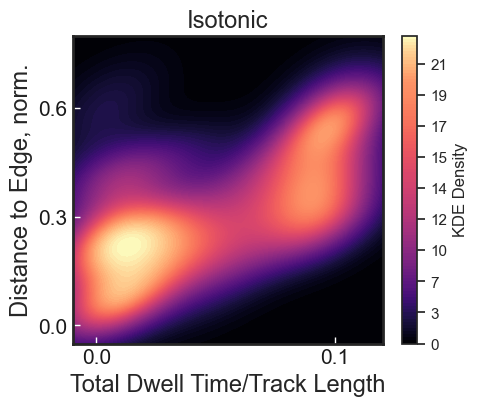

In [7]:
plt.figure(figsize=(5, 4))
ax = sns.kdeplot(
    data=df_dwell_1x,
    x="frac_dwell",
    y="norm_d2edge",
    fill=True,
    thresh=0,
    levels=100,
    cmap="magma",
    zorder=0,
    cbar=True,
    cbar_kws={
        "format": "%d",
        "label": "KDE Density",
        "spacing": "uniform",
    },
)
ax.spines[:].set_linewidth(2)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
    zorder=1,
    colors="white",
    labelcolor="k",
)
plt.title("Isotonic", fontsize=17)
plt.xlabel("Total Dwell Time/Track Length", fontsize=17)
plt.ylabel("Distance to Edge, norm.", fontsize=17)
plt.xlim(-0.01, 0.12)
plt.xticks([0, 0.1])
plt.ylim(-0.05, 0.8)
plt.yticks([0, 0.3, 0.6])
plt.savefig(
    "kdeplot-dwell_d2edge-FL_1x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

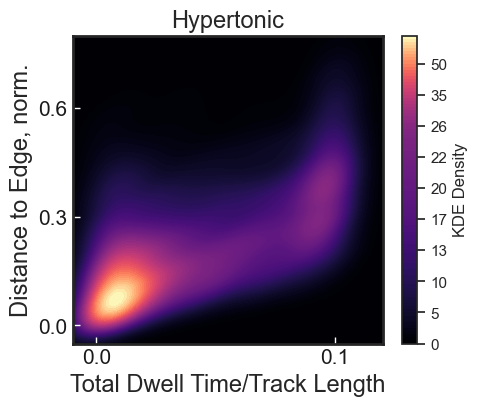

In [8]:
plt.figure(figsize=(5, 4))
ax = sns.kdeplot(
    data=df_dwell_2x,
    x="frac_dwell",
    y="norm_d2edge",
    fill=True,
    thresh=0,
    levels=100,
    cmap="magma",
    zorder=0,
    cbar=True,
    cbar_kws={
        "format": "%d",
        "label": "KDE Density",
        "spacing": "uniform",
    },
)
ax.spines[:].set_linewidth(2)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
    zorder=1,
    colors="white",
    labelcolor="k",
)
plt.title("Hypertonic", fontsize=17)
plt.xlabel("Total Dwell Time/Track Length", fontsize=17)
plt.ylabel("Distance to Edge, norm.", fontsize=17)
plt.xlim(-0.01, 0.12)
plt.xticks([0, 0.1])
plt.ylim(-0.05, 0.8)
plt.yticks([0, 0.3, 0.6])
plt.savefig(
    "kdeplot-dwell_d2edge-FL_2x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

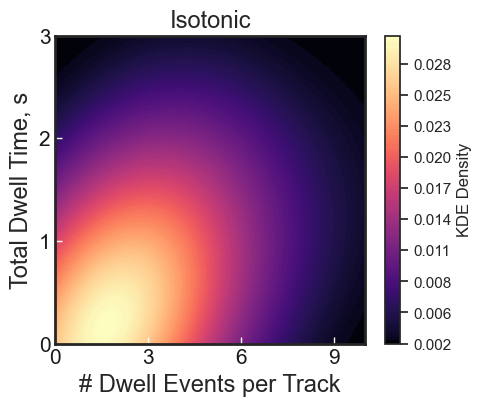

In [9]:
plt.figure(figsize=(5, 4))
ax = sns.kdeplot(
    data=df_dwell_1x,
    x="N_dwell_per_track",
    y="total_dwell_time_s",
    clip=((0, 10), (0, 3)),
    fill=True,
    thresh=0,
    levels=100,
    cmap="magma",
    zorder=0,
    cbar=True,
    cbar_kws={
        "format": "%0.3f",
        "label": "KDE Density",
        "spacing": "uniform",
    },
)
ax.spines[:].set_linewidth(2)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
    zorder=1,
    colors="white",
    labelcolor="k",
)
plt.title("Isotonic", fontsize=17)
plt.xlabel("# Dwell Events per Track", fontsize=17)
plt.ylabel("Total Dwell Time, s", fontsize=17)
plt.xticks([0, 3, 6, 9])
plt.yticks([0, 1, 2, 3])
plt.savefig(
    "kdeplot-dwellN_dwellT-FL_1x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

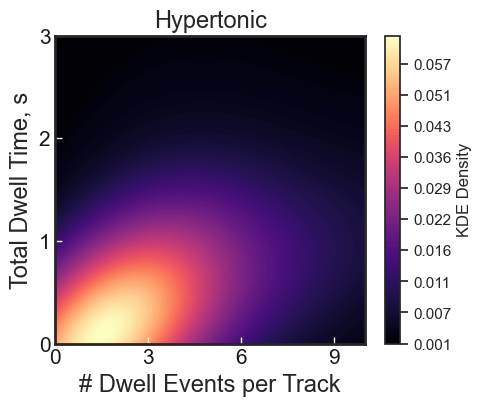

In [10]:
plt.figure(figsize=(5, 4))
ax = sns.kdeplot(
    data=df_dwell_2x,
    x="N_dwell_per_track",
    y="total_dwell_time_s",
    clip=((0, 10), (0, 3)),
    fill=True,
    thresh=0,
    levels=100,
    cmap="magma",
    zorder=0,
    cbar=True,
    cbar_kws={
        "format": "%0.3f",
        "label": "KDE Density",
        "spacing": "uniform",
    },
)
ax.spines[:].set_linewidth(2)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
    zorder=1,
    colors="white",
    labelcolor="k",
)
plt.title("Hypertonic", fontsize=17)
plt.xlabel("# Dwell Events per Track", fontsize=17)
plt.ylabel("Total Dwell Time, s", fontsize=17)
plt.xticks([0, 3, 6, 9])
plt.yticks([0, 1, 2, 3])
plt.savefig(
    "kdeplot-dwellN_dwellT-FL_2x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

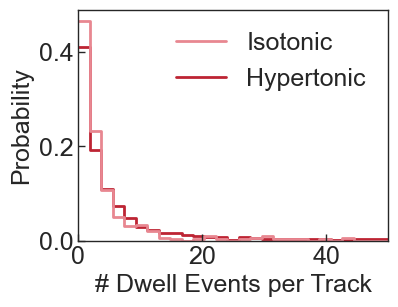

In [22]:
data = pd.concat(
    [
        pd.DataFrame(
            {
                "value": df_dwell_1x["N_dwell_per_track"].to_numpy(),
                "label": "Isotonic",
            }
        ),
        pd.DataFrame(
            {
                "value": df_dwell_2x["N_dwell_per_track"].to_numpy(),
                "label": "Hypertonic",
            }
        ),
    ],
    ignore_index=True,
)

plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=data,
    x="value",
    hue="label",
    hue_order=["Isotonic", "Hypertonic"],
    palette=[color_1x, color_2x],
    bins=27,
    binrange=(0, 50),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
    fill=False,
)
plt.xlim(0, 50)
sns.move_legend(
    ax,
    1,
    title=None,
    frameon=False,
    fontsize=18,
)
plt.xlabel("# Dwell Events per Track", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig(
    "histo-dwellN-FL_1x_vs_2x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

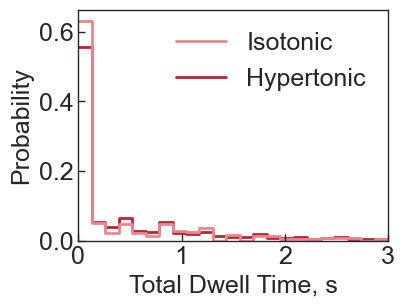

In [23]:
data = pd.concat(
    [
        pd.DataFrame(
            {
                "value": df_dwell_1x["total_dwell_time_s"].to_numpy(),
                "label": "Isotonic",
            }
        ),
        pd.DataFrame(
            {
                "value": df_dwell_2x["total_dwell_time_s"].to_numpy(),
                "label": "Hypertonic",
            }
        ),
    ],
    ignore_index=True,
)

plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=data,
    x="value",
    hue="label",
    hue_order=["Isotonic", "Hypertonic"],
    palette=[color_1x, color_2x],
    bins=23,
    binrange=(0, 3),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
    fill=False,
)
plt.xlim(0, 3)
sns.move_legend(
    ax,
    1,
    title=None,
    frameon=False,
    fontsize=18,
)
plt.xlabel("Total Dwell Time, s", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig(
    "histo-total_dwell-FL_1x_vs_2x.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

### Pick and plot tracks

In [13]:
df_dwell_1x.keys()


Index(['filename', 'fname_RNA', 'fname_condensate', 'rna_trackID',
       'tracklength', 'mean_x', 'mean_y', 'N_dwell_per_track',
       'total_dwell_time_s', 'frac_dwell', 'mean_R_nm', 'mean_d2center_nm',
       'norm_d2center', 'mean_d2edge_nm', 'norm_d2edge', 't', 'x', 'y',
       'InCondensate'],
      dtype='object')

In [14]:
df_1x_multiple_short = df_dwell_1x.sort_values(
    by=[
        "N_dwell_per_track",
        "total_dwell_time_s",
        'norm_d2edge',
    ],
    ascending=[
        False,
        False,
        True,
    ],
).iloc[:5]
df_2x_multiple_short = df_dwell_2x.sort_values(
    by=[
        "N_dwell_per_track",
        "total_dwell_time_s",
        'norm_d2edge',
    ],
    ascending=[
        False,
        False,
        True,
    ],
).iloc[:5]
df_2x_multiple_short

,filename,fname_RNA,fname_condensate,rna_trackID,tracklength,mean_x,mean_y,N_dwell_per_track,total_dwell_time_s,frac_dwell,mean_R_nm,mean_d2center_nm,norm_d2center,mean_d2edge_nm,norm_d2edge,t,x,y,InCondensate
4799,colocalization_AIO-20220508-FLmRNA_2x_FOV-14.csv,SPT_results_AIO-20220508-FLmRNA_2x_FOV-14-righ...,condensates_AIO-20220508-FLmRNA_2x_FOV-14-crop...,359.0,200,400.005329,384.285904,106,9.6,0.0480,249.740591,142.706767,0.571420,99.312118,0.397661,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[399.5038758014188, 399.5646078107281, 399.487...","[383.9643750785898, 384.0189836500269, 384.189...","[False, False, False, True, False, False, Fals..."
8007,colocalization_AIO-20220508-FLmRNA_2x_FOV-23.csv,SPT_results_AIO-20220508-FLmRNA_2x_FOV-23-righ...,condensates_AIO-20220508-FLmRNA_2x_FOV-23-crop...,570.0,200,321.685590,411.462152,98,9.6,0.0480,499.703926,352.656877,0.705732,111.186852,0.222505,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[321.5960235983366, 321.37574469214144, 321.31...","[411.944369180501, 412.2650295559743, 412.1417...","[False, False, False, False, False, False, Fal..."
4188,colocalization_AIO-20220508-FLmRNA_2x_FOV-12.csv,SPT_results_AIO-20220508-FLmRNA_2x_FOV-12-righ...,condensates_AIO-20220508-FLmRNA_2x_FOV-12-crop...,757.0,200,318.313602,202.049459,94,11.9,0.0595,209.860031,177.561347,0.846094,34.550510,0.164636,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[317.4144543681759, 317.5973356846597, 317.567...","[201.56737154572505, 201.5806318497422, 201.39...","[True, False, True, True, True, True, True, Tr..."
4795,colocalization_AIO-20220508-FLmRNA_2x_FOV-14.csv,SPT_results_AIO-20220508-FLmRNA_2x_FOV-14-righ...,condensates_AIO-20220508-FLmRNA_2x_FOV-14-crop...,335.0,200,201.382288,309.385378,94,7.9,0.0395,328.316654,237.703370,0.724006,58.001264,0.176663,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[201.5002641663968, 201.4050600158996, 201.410...","[309.3963731609863, 309.3207077639867, 309.306...","[False, False, True, False, False, False, True..."
9370,colocalization_AIO-20220508-FLmRNA_2x_FOV.csv,SPT_results_AIO-20220508-FLmRNA_2x_FOV-right_r...,condensates_AIO-20220508-FLmRNA_2x_FOV-cropped...,244.0,200,40.710013,352.220427,92,7.1,0.0355,256.740225,258.639214,1.007397,47.082166,0.183384,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[40.49202776479193, 40.218959239612325, 40.449...","[353.13852669416394, 353.1431977616025, 352.85...","[False, False, False, False, False, False, Fal..."
